In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#read the data
data = pd.read_csv('ionosphere.csv')

#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [18]:
#split the data into train and test
X = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a model using Logistic Regression from sklearn. 

In [34]:
logisticRegrRidge = LogisticRegression(penalty="l2", C=1)
logisticRegrLasso = LogisticRegression(penalty="l1", C=1)

    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [48]:
#perform ridge regression and test accuracy
logisticRegrRidge.fit(X_train, y_train)
predictions = logisticRegrRidge.predict(X_test)
score = logisticRegrRidge.score(X_test, y_test)
print(score)

0.830985915493


    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [49]:
#perform lasso regression and test accuracy
logisticRegrLasso.fit(X_train, y_train)
predictions = logisticRegrLasso.predict(X_test)
score = logisticRegrLasso.score(X_test, y_test)
print(score)

0.859154929577


    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

In [57]:
logisticRegrSample = LogisticRegression(penalty="l1", C=1.2)
logisticRegrSample.fit(X_train, y_train)
predictions = logisticRegrSample.predict(X_test)
print(logisticRegrSample.score(X_test, y_test))

0.845070422535


In [59]:
logisticRegrSample1 = LogisticRegression(penalty="l2", C=2.0)
logisticRegrSample1.fit(X_train, y_train)
predictions = logisticRegrSample1.predict(X_test)
print(logisticRegrSample1.score(X_test, y_test))


0.830985915493


In [96]:
#perform tuning and record the results
results = pd.DataFrame(columns = ['C','Regularization','Accuracy'])
results1 = pd.DataFrame({'C': [1.0],'Regularization': ['l1'],'Accuracy': [0.859]})
results2 = pd.DataFrame({'C': [1.0],'Regularization': ['l2'],'Accuracy': [0.830]})
results3 = pd.DataFrame({'C': [1.2],'Regularization': ['l1'],'Accuracy': [0.845]})
results4 = pd.DataFrame({'C': [2.0],'Regularization': ['l2'],'Accuracy': [0.830]})
final = results.append(results1,ignore_index=True).append(results2,ignore_index=True).append(results3,ignore_index=True).append(results4,ignore_index=True)
final

,Accuracy,C,Regularization
0,0.859,1.0,l1
1,0.830,1.0,l2
2,0.845,1.2,l1
3,0.830,2.0,l2


    4. Plot the coefficients against lambdas and accuracy against lambdas for both lasso and ridge regularization.

In [ ]:
#plot coefficients against lambdas and accuracy against lambdas

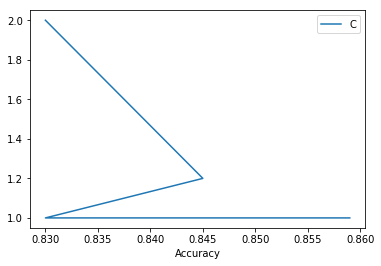

In [97]:
final.plot(x = 'Accuracy', y = 'C')

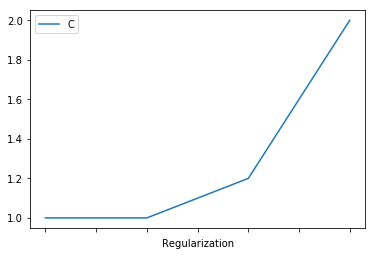

In [98]:
final.plot(x = 'Regularization', y = 'C')